# <center>BAYESIAN INFERENCE</center>
Nhắc lại *frequentist inference*, thì mean hoặc proportion của sample sẽ tuân theo central limit theorem, tức là khoảng tin cậy 95% nằm trong 1.96 SD.  
Còn *bayesian inference*, chúng ta phải có prior. Từ prior và likelihood của sample, ta sẽ tính được posterior distribution.  
Từ đó, ta có:
- Credible interval 95%
- HPD: Highest posterior density: tức là credible interval 95% nhưng hẹp nhất

*Để biết PDF của các loại phân phối, xin xem lại các bài trước*  

---

Ví dụ:  
Ta không biết đồng xu có fake hay không? Prior $\sim U(0,1)$  
Prior PDF = $I_{\{0 \leq p \leq 1\}}$  
Ta thu thập data từ đồng xu này?  
Likelihood = bernoulli = $ p^k(1-p)^{n-k} $

1. Frequentist inference:  
Tính MLE của likelihood, ta dự đoán $p_{\text{đồng xu}} = p_{\text{mẫu}} \pm 1.96\sqrt{\frac{p(1-p)}{n}} $

2. Bayesian inference:  
$ f(p|data) = \frac{\text{likelihood}\;\times\;\text{prior}} {\text{normalizing constant    }  } $  
$ f(p|data) = \frac{p^k(1-p)^{n-k} I_{\{0 \leq p \leq 1\}}}{\int_{-\infty}^\infty p^k(1-p)^{n-k} I_{\{0 \leq p \leq 1\}}dp} $

**data = [1]**

1. Frequentist inference:  
khoảng tin cậy 95% = $ 1 + 1.96\sqrt{\frac{1(1-1)}{1}} = 1$

2. Bayesian inference:  
$ f(p|data) = \frac{p^1(1-p)^{1-1} I_{\{0 \leq p \leq 1\}}}{\int_{-\infty}^\infty p^1(1-p)^{1-1} I_{\{0 \leq p \leq 1\}}dp} = \frac{p I_{\{0 \leq p \leq 1\}}}{\int_0^1 p dp}  = 2p I_{\{0 \leq p \leq 1\}}$

Từ đó:  
- $ P(p<x) = \int_0^x 2pI_{\{0 \leq p \leq 1\}} = x^2$  
$ P(\sqrt{0.025}< p<\sqrt{0.975}) = 0.95 $  
=> Credible Interval 95% = (0.158, 0.987)  
- Tìm HPD:

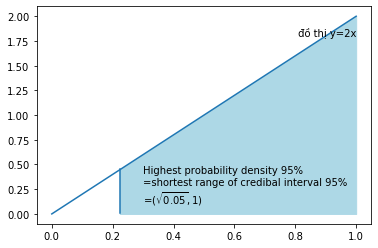

In [23]:
# vẽ đồ thị của posterior distribution với data = [1]
import numpy as np
import matplotlib.pyplot as plt
arr = np.linspace(0,1,20)
plt.plot(arr, 2*arr)
plt.text(0.8, 1.8, " đồ thị y=2x")

# HPD 95% là khoảng ngắn nhất chứa 95% density, 
# nhìn hình ta thấy đây là khoảng từ sqrt(0.05) đó đến 1.
plt.axvline(np.sqrt(0.05), 0.05 ,0.25)
arr2 = np.linspace(np.sqrt(0.05), 1, 18)
plt.fill_between(arr2, 2*arr2, color="lightblue")
plt.text(0.3, 0.1,
         "Highest probability density 95%\n"
         "=shortest range of credibal interval 95%\n"
         "=$(\sqrt{0.05}, 1)$");

**Trong thực tế, việc tính ra posterior trực tiếp thường không được vì tính mẫu số của bayes theorem khó khăn, tuy nhiên ta có thể tìm đồng dạng của nó bằng cách giấu tạm mẫu số ấy.**  
$$ \text{Posterior} \propto (\text{Likelihood} \times \text{Prior}) $$  
Việc tìm normalizing constant có thể bằng cách chuyển posterior distribution của mình sang một dạng distribution tổng quát như gamma, beta, normal,.. hoặc có thể ước lượng bằng cách lấy mẫu thử từ posterior.